# Transfer Learning EfficientNet

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
from tensorflow.keras.applications import EfficientNetB0
base_model = EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [4]:
for layer in base_model.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(base_model.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=base_model.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 90 images belonging to 3 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 33 images belonging to 3 classes.


In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
    callbacks=[early_stop]
)

C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
3/3 [==============================] - 38s 11s/step - loss: 8.1879 - accuracy: 0.1869 - val_loss: 9.3936 - val_accuracy: 0.3030
Epoch 2/100
3/3 [==============================] - 21s 8s/step - loss: 6.7741 - accuracy: 0.3379 - val_loss: 5.8780 - val_accuracy: 0.3030
Epoch 3/100
3/3 [==============================] - 23s 8s/step - loss: 5.0253 - accuracy: 0.3668 - val_loss: 2.0067 - val_accuracy: 0.3939
Epoch 4/100
3/3 [==============================] - 22s 7s/step - loss: 2.8393 - accuracy: 0.4358 - val_loss: 3.2143 - val_accuracy: 0.3030
Epoch 5/100
3/3 [==============================] - 21s 8s/step - loss: 4.0306 - accuracy: 0.3298 - val_loss: 3.6813 - val_accuracy: 0.3939
Epoch 6/100
3/3 [==============================] - 22s 7s/step - loss: 3.5872 - accuracy: 0.3269 - val_loss: 3.0199 - val_accuracy: 0.3030
Epoch 7/100
3/3 [==============================] - 22s 8s/step - loss: 3.2237 - accuracy: 0.3490 - val_loss: 4.3100 - val_accuracy: 0.3030
Epoch 8/100
3/3 [=========

3/3 [==============================] - 10s 3s/step - loss: 1.4224 - accuracy: 0.3475 - val_loss: 1.3525 - val_accuracy: 0.3030
Epoch 60/100
3/3 [==============================] - 10s 3s/step - loss: 1.4479 - accuracy: 0.3686 - val_loss: 1.4276 - val_accuracy: 0.3030
Epoch 61/100
3/3 [==============================] - 10s 4s/step - loss: 1.5420 - accuracy: 0.3601 - val_loss: 1.3191 - val_accuracy: 0.3939
Epoch 62/100
3/3 [==============================] - 10s 4s/step - loss: 1.5135 - accuracy: 0.2539 - val_loss: 1.1247 - val_accuracy: 0.3030
Epoch 63/100
3/3 [==============================] - 10s 4s/step - loss: 1.1767 - accuracy: 0.3764 - val_loss: 1.2087 - val_accuracy: 0.3030
Epoch 64/100
3/3 [==============================] - 10s 4s/step - loss: 1.2353 - accuracy: 0.3213 - val_loss: 1.1606 - val_accuracy: 0.3939
Epoch 65/100
3/3 [==============================] - 10s 4s/step - loss: 1.3268 - accuracy: 0.3807 - val_loss: 1.0875 - val_accuracy: 0.3939
Epoch 66/100
3/3 [===============

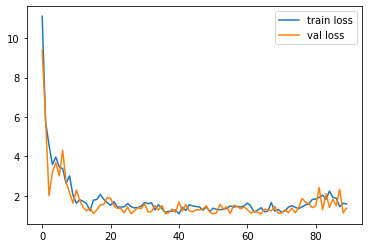

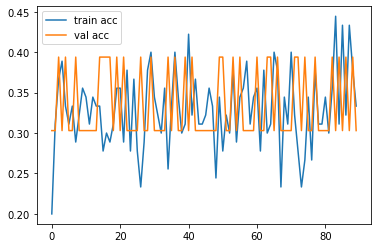

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_efficientB0.h5')

In [16]:
y_pred = model.predict(test_set)

In [17]:
y_pred

array([[0.3111311 , 0.57818824, 0.11068063],
       [0.30935648, 0.576183  , 0.11446054],
       [0.31185347, 0.5774546 , 0.11069189],
       [0.31217936, 0.57790214, 0.10991853],
       [0.31020677, 0.5766284 , 0.11316488],
       [0.3110273 , 0.5765249 , 0.11244784],
       [0.31170434, 0.5774764 , 0.11081922],
       [0.31072208, 0.5781125 , 0.11116549],
       [0.31038117, 0.579267  , 0.11035174],
       [0.31029633, 0.5762989 , 0.11340479],
       [0.31020677, 0.5766284 , 0.11316488],
       [0.30884847, 0.5732648 , 0.11788666],
       [0.31047556, 0.57695246, 0.11257201],
       [0.31051853, 0.5786237 , 0.11085782],
       [0.30941352, 0.5736873 , 0.11689918],
       [0.3079642 , 0.5741941 , 0.11784174],
       [0.31128967, 0.5782424 , 0.1104679 ],
       [0.31101945, 0.57973135, 0.10924913],
       [0.31173784, 0.57911634, 0.10914584],
       [0.3102827 , 0.5772053 , 0.11251201],
       [0.31246096, 0.57727826, 0.11026078],
       [0.31143293, 0.5785864 , 0.10998069],
       [0.

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [20]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_set.classes,y_pred))
print(confusion_matrix(test_set.classes,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.30      1.00      0.47        10
           2       0.00      0.00      0.00        13

    accuracy                           0.30        33
   macro avg       0.10      0.33      0.16        33
weighted avg       0.09      0.30      0.14        33

[[ 0 10  0]
 [ 0 10  0]
 [ 0 13  0]]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
